In [2]:
# -------------Paquetes para análisis y visualización de datos--------------#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#------------Paquete para análisis de multicolinealidad------------#
from statsmodels.stats.outliers_influence import variance_inflation_factor

#------------Paquetes para transformación--------------#
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import  LabelEncoder, OneHotEncoder, StandardScaler

#------------Paquetes para entranamiento y evaluación del modelo------------#
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import statsmodels.api as sm

#------------Paquete para supresión de advertencias----------------#
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Importamos los datos estadisticos (kaggle.com)
test_df = pd.read_csv('/content/drive/MyDrive/Ciencia de Datos/Notebooks/Phone Price Data/test.csv')
train_df = pd.read_csv('/content/drive/MyDrive/Ciencia de Datos/Notebooks/Phone Price Data/train.csv')

dataset = pd.concat([test_df, train_df], ignore_index=True)
dataset.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1.0,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,NaN
1,2.0,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,NaN
2,3.0,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,NaN
3,4.0,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,NaN
4,5.0,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,NaN


In [21]:
dataset = pd.read_csv(r'/content/mobile_price_data.csv')
dataset.head()

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,"Realme Narzo 10A (So White, 32 GB)","₹8,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
1,"Realme Narzo 10A (So Blue, 32 GB)","₹8,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
2,"Realme Narzo 10A (So Blue, 64 GB)","₹9,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
3,"Realme Narzo 10A (So White, 64 GB)","₹9,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
4,"Realme Narzo 10 (That Green, 128 GB)","₹11,999",That Green,Dual Sim,16.51 cm (6.5 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,128 GB,4 GB,48MP + 8MP + 2MP + 2MP,16MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75.4 mm,164.4 mm,9 mm,199 g


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   mobile_name    459 non-null    object
 1   mobile_price   459 non-null    object
 2   mobile_color   459 non-null    object
 3   dual_sim       459 non-null    object
 4   disp_size      459 non-null    object
 5   resolution     459 non-null    object
 6   os             459 non-null    object
 7   num_cores      459 non-null    object
 8   mp_speed       459 non-null    object
 9   int_memory     459 non-null    object
 10  ram            459 non-null    object
 11  p_cam          459 non-null    object
 12  f_cam          459 non-null    object
 13  network        459 non-null    object
 14  bluetooth      459 non-null    object
 15  battery_power  459 non-null    object
 16  mob_width      459 non-null    object
 17  mob_height     459 non-null    object
 18  mob_depth      459 non-null   

In [10]:
# Codigo proveniente de chatGPT
import re

def rename_columns_lowercase_no_spaces(df):
  """
  Renames columns of a DataFrame to lowercase without spaces,
  replacing spaces with underscores.

  Args:
      df (pandas.DataFrame): The DataFrame to rename columns.

  Returns:
      pandas.DataFrame: The DataFrame with renamed columns.
  """
  new_names = [re.sub(r"\s+", "_", col.lower()) for col in df.columns]
  return df.rename(columns=dict(zip(df.columns, new_names)))

In [11]:
dataset = rename_columns_lowercase_no_spaces(dataset.copy())  # Avoid modifying original DataFrame

In [23]:
dataset.isna().sum()

mobile_name      0
mobile_price     0
mobile_color     0
dual_sim         0
disp_size        0
resolution       0
os               0
num_cores        0
mp_speed         0
int_memory       0
ram              0
p_cam            0
f_cam            0
network          0
bluetooth        0
battery_power    0
mob_width        0
mob_height       0
mob_depth        0
mob_weight       0
dtype: int64

In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset.duplicated().sum()

91

In [26]:
dataset.drop_duplicates(keep='first', inplace=True)

In [27]:
dataset.describe()

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
count,406,406,406,406,406,406,406,406,406,406,406,406,406,406,406,406,406,406,406,406
unique,363,139,165,2,36,48,18,3,18,7,7,49,15,18,1,34,70,81,55,62
top,"Samsung Galaxy A21s (Blue, 64 GB)","₹9,999",Black,Dual Sim,15.8 cm (6.22 inch),2340 x 1080 pixels,Android Pie 9,Octa Core,2 GHz,64 GB,4 GB,13MP + 2MP,16MP Front Camera,"3G, 4G VOLTE, 4G, 2G",Yes,4000 mAh,75.6 mm,156.7 mm,8.8 mm,191 g
freq,2,17,24,405,42,59,107,393,133,157,130,60,100,109,406,124,25,23,46,27


Tratamiento a aplicar:


1.   Limpiar la variable objetivo **mobile_price** para solo mantener los numeros
2.   Convertir la variable **dual_sim** en dummie
3.  La variable **bluetooh** puede ser eliminada, ya que contiene solo 1 valor



In [30]:
# prompt: edit the mobile_price column to keep only number

dataset['mobile_price'] = dataset['mobile_price'].str.replace('[₹,]', '', regex=True).astype(float)

In [31]:
dataset['mobile_price'].describe()

count      406.000000
mean     16683.002463
std       8721.218497
min       6000.000000
25%      10919.500000
50%      14952.000000
75%      18990.000000
max      60990.000000
Name: mobile_price, dtype: float64

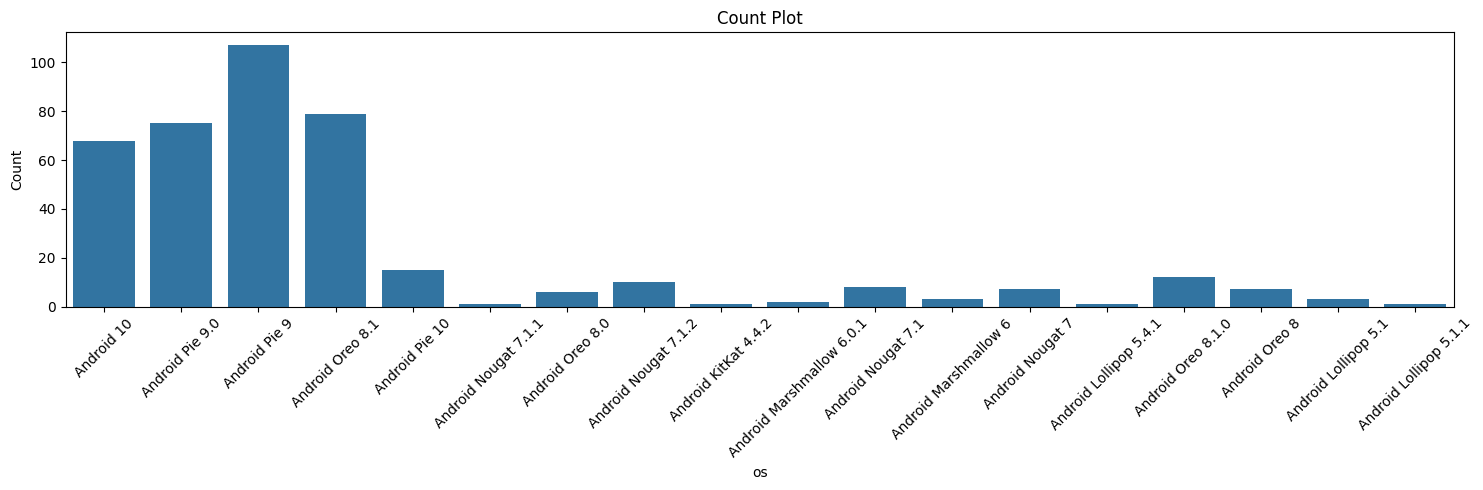

In [40]:
plt.figure(figsize=(15, 5))

x = "os"

# Create the countplot
ax = sns.countplot(x= x, data = dataset)

# Rotate X-axis labels
plt.xticks(rotation=45)  # Adjust rotation angle as needed (e.g., 60, 90)

# Optional: Adjust other plot elements
plt.xlabel(x)
plt.ylabel("Count")
plt.title("Count Plot")

plt.tight_layout()
plt.show()

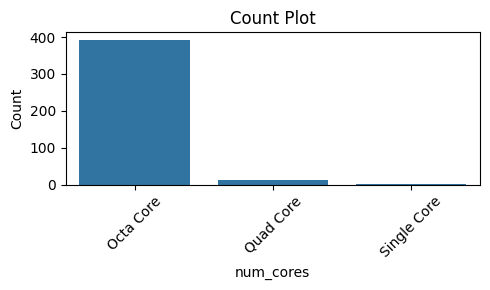

In [41]:
plt.figure(figsize=(5, 3))

x = "num_cores"

# Create the countplot
ax = sns.countplot(x= x , data=dataset)

# Rotate X-axis labels
plt.xticks(rotation=45)  # Adjust rotation angle as needed (e.g., 60, 90)

# Optional: Adjust other plot elements
plt.xlabel(x)
plt.ylabel("Count")
plt.title("Count Plot")

plt.tight_layout()
plt.show()

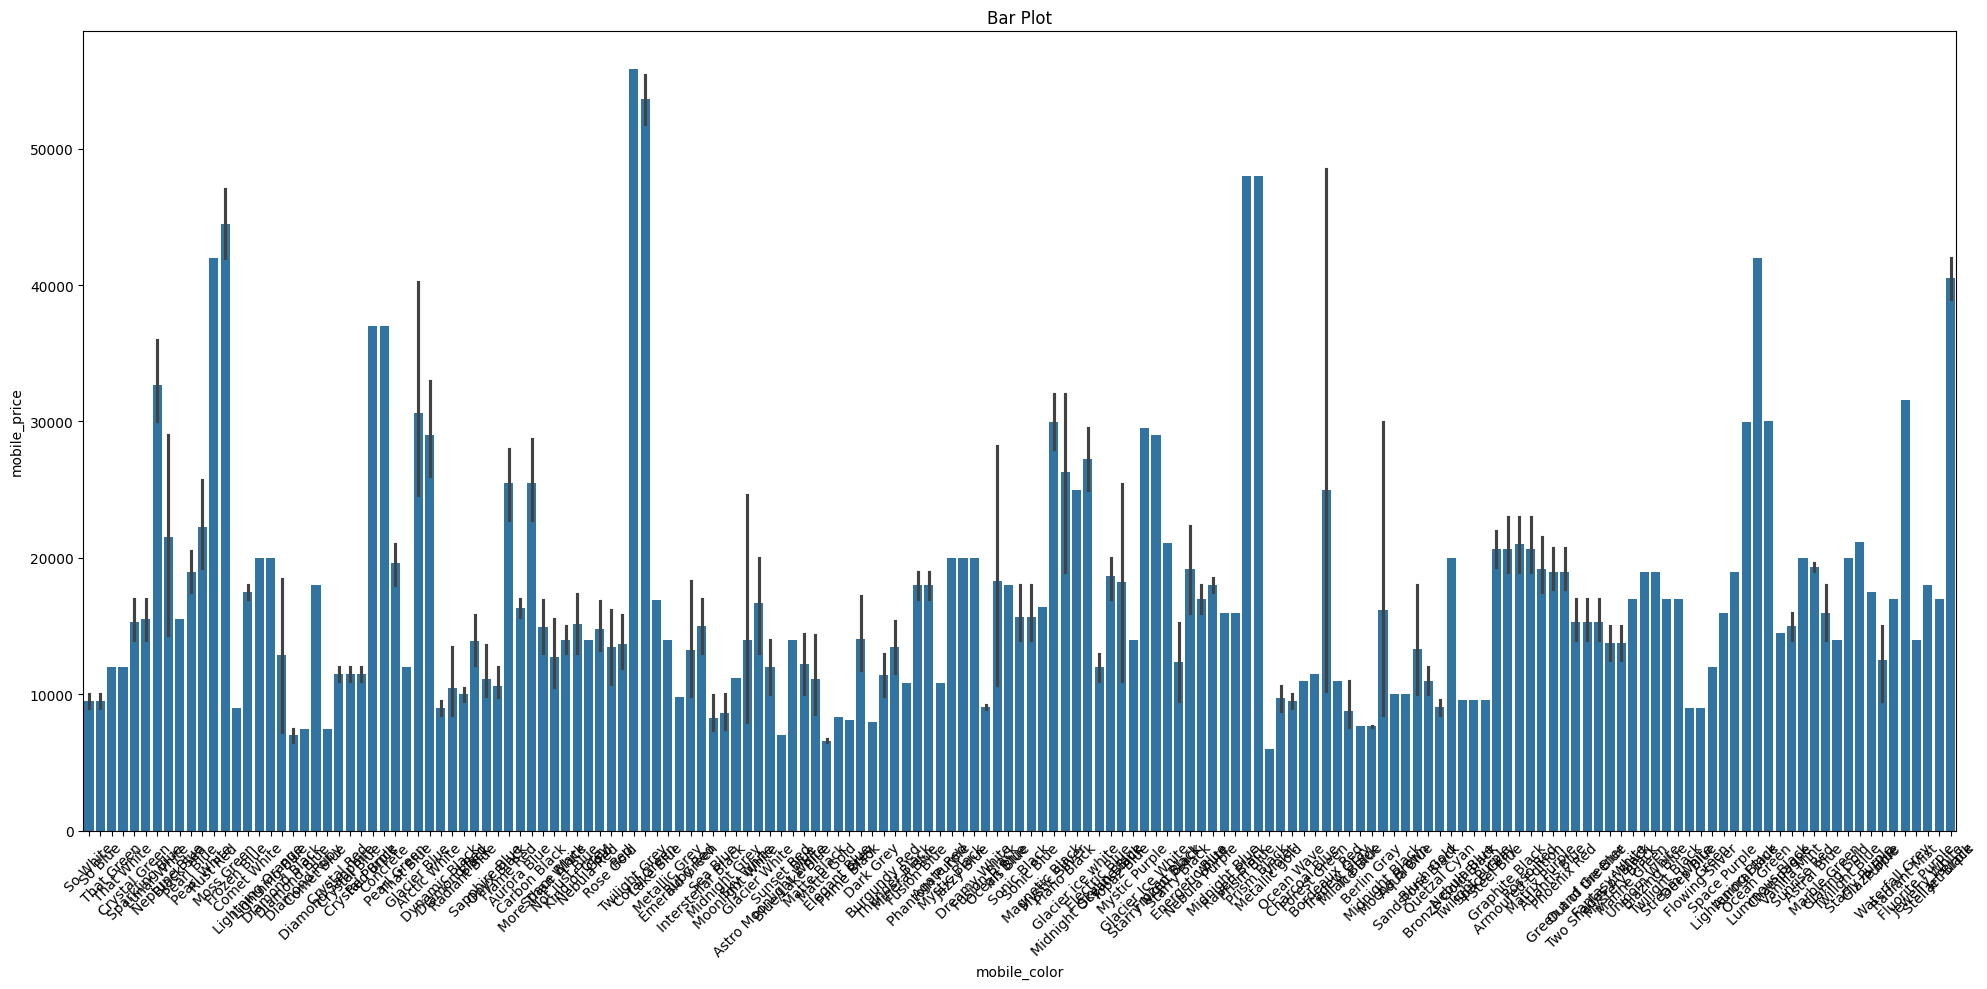

In [44]:
plt.figure(figsize=(20, 10))

x = "mobile_color"
y = "mobile_price"

# Create the barplot
ax = sns.barplot(x= x, y=y, data = dataset)

# Rotate X-axis labels
plt.xticks(rotation=45)  # Adjust rotation angle as needed (e.g., 60, 90)

# Optional: Adjust other plot elements
plt.xlabel(x)
plt.ylabel(y)
plt.title("Bar Plot")

plt.tight_layout()
plt.show()


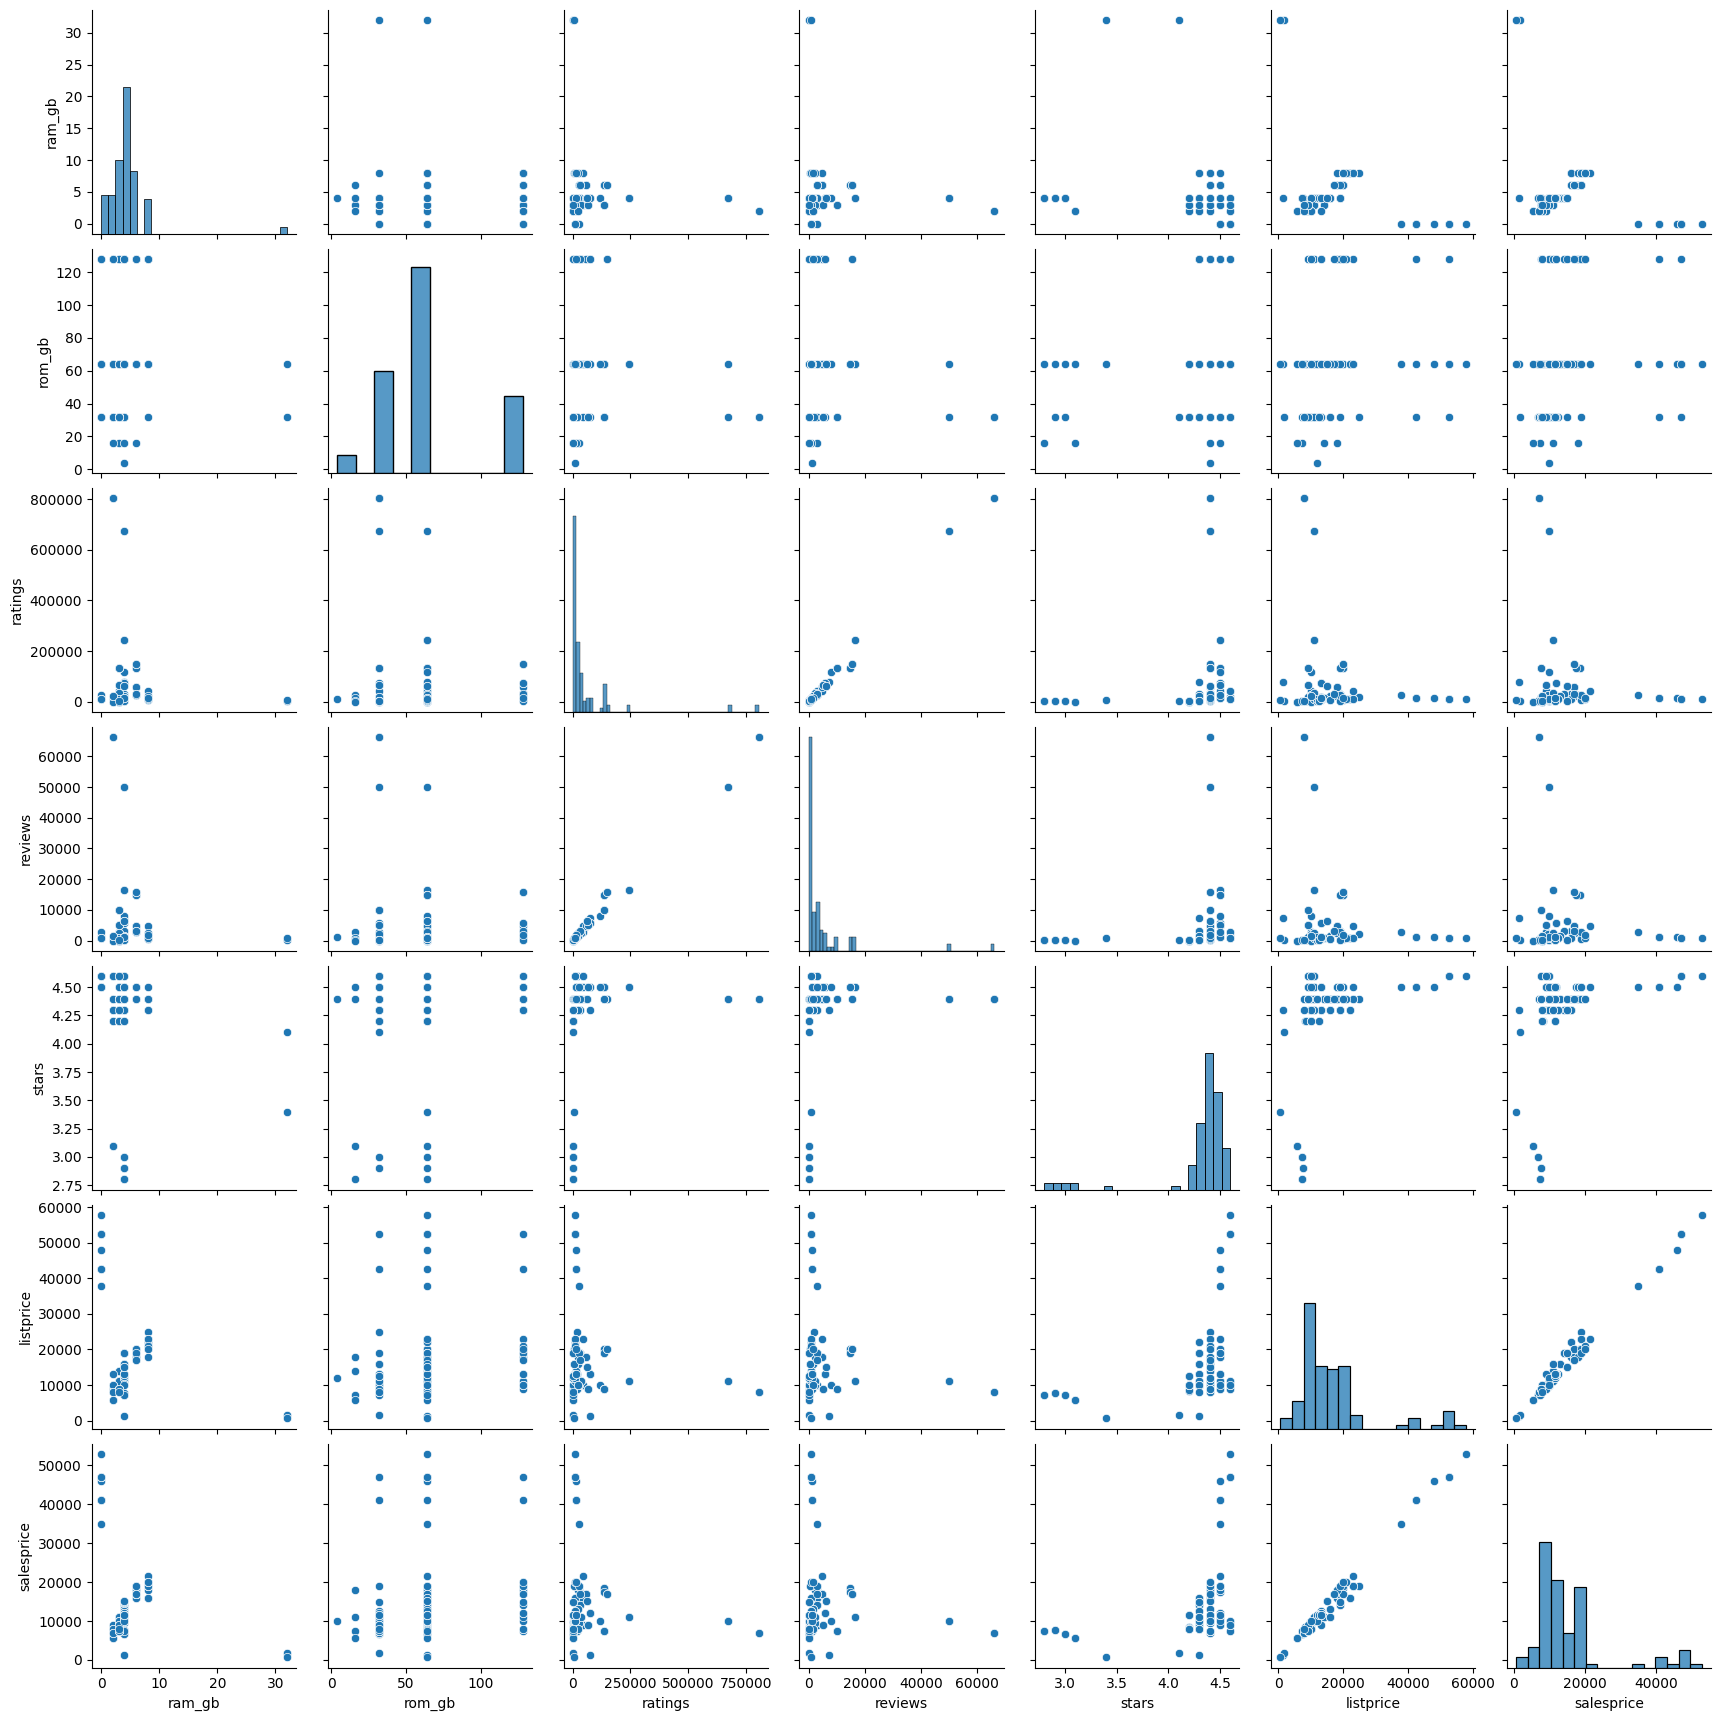

In [18]:
sns.pairplot(dataset)

In [19]:
dataset['mobilename'].unique()

array(['Redmi 8 (Onyx Black, 64 GB)', 'Realme 5i (Forest Green, 64 GB)',
       'Realme 5i (Aqua Blue, 64 GB)', 'Redmi 8 (Sapphire Blue, 64 GB)',
       'POCO X2 (Matrix Purple, 128 GB)',
       'POCO X2 (Atlantis Blue, 64 GB)', 'Realme 6 (Comet Blue, 64 GB)',
       'POCO X2 (Atlantis Blue, 128 GB)',
       'Realme C11 (Rich Green, 32 GB)', 'Realme C11 (Rich Grey, 32 GB)',
       'Realme Narzo 10A (So White, 32 GB)',
       'Realme Narzo 10A (So Blue, 64 GB)',
       'Realme Narzo 10A (So White, 64 GB)',
       'Realme Narzo 10A (So Blue, 32 GB)',
       'POCO X2 (Matrix Purple, 64 GB)', 'Realme 6 (Comet White, 64 GB)',
       'Apple iPhone XR (Black, 64 GB)', 'Infinix S5 Pro (Violet, 64 GB)',
       'Motorola G8 Power Lite (Royal Blue, 64 GB)',
       'Realme 6 Pro (Lightning Blue, 64 GB)',
       'Realme 6 Pro (Lightning Orange, 64 GB)',
       'Infinix Hot 9 Pro (Ocean Wave, 64 GB)',
       'Infinix Hot 9 Pro (Violet, 64 GB)',
       'Motorola G8 Power Lite (Arctic Blue, 64 GB)',
 

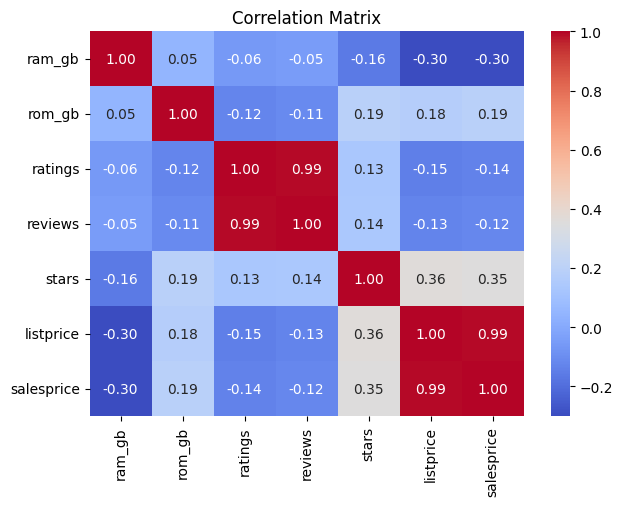

In [20]:
# Compute the correlation matrix
corr_matrix = dataset.select_dtypes(include=[np.number]).corr()

# Plot the correlation matrix using Seaborn's heatmap
plt.figure(figsize=(7, 5))  # Adjust the figure size if needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
plt.figure(figsize=(15, 5))

# Create the countplot
ax = sns.countplot(x="storage", data=dataset)

# Rotate X-axis labels
plt.xticks(rotation=45)  # Adjust rotation angle as needed (e.g., 60, 90)

# Optional: Adjust other plot elements
plt.xlabel("storage")
plt.ylabel("Count")
plt.title("Count Plot (Diagonal X-axis)")

plt.tight_layout()
plt.show()

In [ ]:
dataset['storage'].unique()

array(['128 GB', '16 GB', '64 GB', '16 MB', '256 GB', '32 GB', '8 GB',
       '512 GB', '2 MB', '4 GB', 'Expandable Upto 16 GB', '64 MB',
       'Expandable Upto 32 GB', '4 MB', '128 MB', '1 TB', '512 MB',
       '129 GB', '256 MB', '153 MB', '130 GB', '8 MB', '10 MB', '100 MB',
       '140 MB'], dtype=object)

Hagamos una conversion de la capacidad de almacenamiento.

In [ ]:
dataset['storage_mb'] = np.where((dataset['storage'].str.contains('Expandable')) | (dataset['storage'].str.contains('GB')),  dataset['storage'].str.extract(r'(\d+)')[0].astype('int') * 1000,
                               np.where(dataset['storage'].str.contains('MB'),  dataset['storage'].str.extract(r'(\d+)')[0].astype('int'), 0))
dataset.head()

,brands,models,colors,memory,storage,camera,rating,selling_price,original_price,mobile,discount,discount_percentage,storage_mb
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998,128000
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000,16000
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000,64000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000,64000
5,GIONEE,L800,Black,8 MB,16 MB,Yes,4.0,2199,2199,GIONEE L800,0,0.000000,16


In [ ]:
dataset['memory_mb'] = np.where(dataset['memory'].str.contains('GB'),  dataset['memory'].str.extract(r'(\d+)')[0].astype('int') * 1000, dataset['memory'].str.extract(r'(\d+)')[0].astype('int'))
dataset.head()

,brands,models,colors,memory,storage,camera,rating,selling_price,original_price,mobile,discount,discount_percentage,storage_mb,memory_mb
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998,128000,8000
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000,16000,2000
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000,64000,4000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000,64000,4000
5,GIONEE,L800,Black,8 MB,16 MB,Yes,4.0,2199,2199,GIONEE L800,0,0.000000,16,8


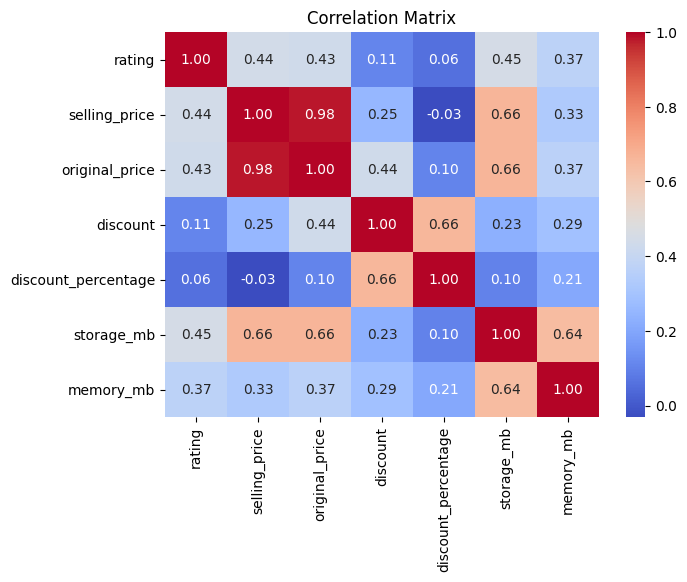

In [ ]:
# Compute the correlation matrix
corr_matrix = dataset.select_dtypes(include=[np.number]).corr()

# Plot the correlation matrix using Seaborn's heatmap
plt.figure(figsize=(7, 5))  # Adjust the figure size if needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

De entrada se evidencia, como era de esperarse, que hay variables con alta correlacion. La variable 'camera' puede ser excluida.

In [ ]:
dataset_ = dataset.drop(columns={'mobile','models','original_price', 'discount_percentage', 'camera', 'storage', 'memory', 'colors', 'memory_mb'}, axis=1)
dataset_.head()

,brands,rating,selling_price,discount,storage_mb
0,SAMSUNG,4.3,19330,1669,128000
1,Nokia,3.8,10199,0,16000
3,Infinix,4.2,12999,0,64000
4,Apple,4.6,49900,0,64000
5,GIONEE,4.0,2199,0,16


Text(0.5, 0, 'rating')

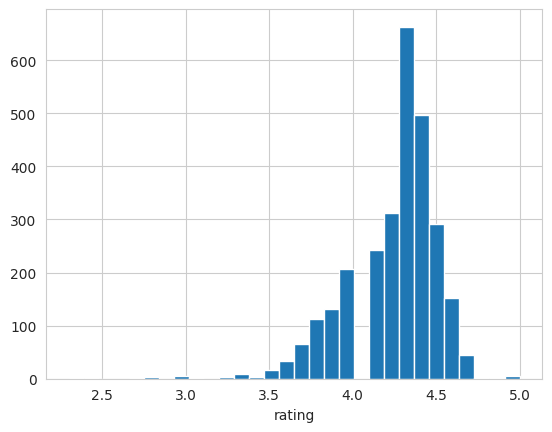

In [ ]:
sns.set_style('whitegrid')
dataset_['rating'].hist(bins=30)
plt.xlabel('rating')

In [ ]:
len(dataset_['rating'].unique())

25

In [ ]:
len(dataset_['brands'].unique())

17

In [ ]:
# calculate interquartile range
q25, q75 = np.percentile(dataset_['selling_price'], 25), np.percentile(dataset_['selling_price'], 75)
iqr = q75 - q25

print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

# identify outliers
outliers = [x for x in dataset_['selling_price'] if x < lower or x > upper]
print('Outliers Identificados: %d' % len(outliers))

Percentiles: 25th=9900.000, 75th=25999.000, IQR=16099.000
Outliers Identificados: 311


In [ ]:
# Eliminación de los outliers
dataset_ = dataset_[(dataset_['selling_price'] >= lower) & (dataset_['selling_price'] <= upper)]

<Axes: xlabel='selling_price'>

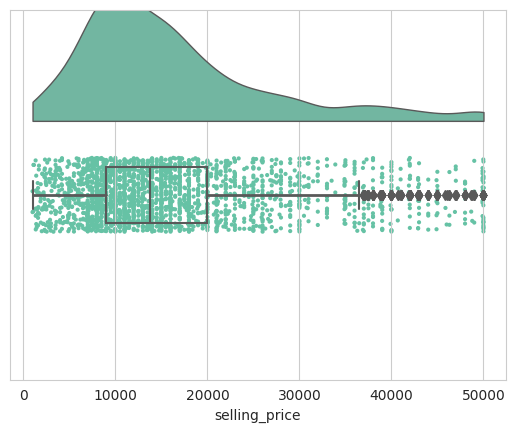

In [ ]:
pt.RainCloud(x=dataset_['selling_price'])

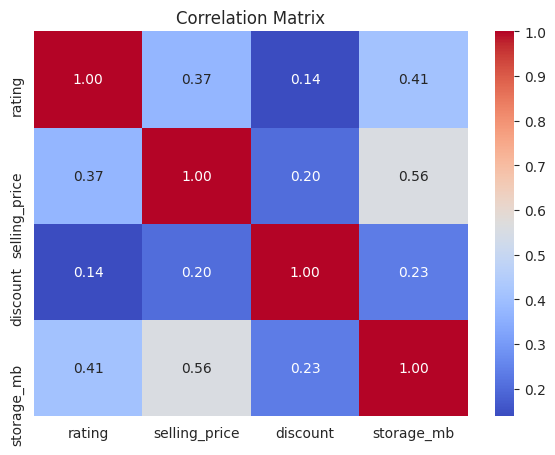

In [ ]:
# Compute the correlation matrix
corr_matrix = dataset_.select_dtypes(include=[np.number]).corr()

# Plot the correlation matrix using Seaborn's heatmap
plt.figure(figsize=(7, 5))  # Adjust the figure size if needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

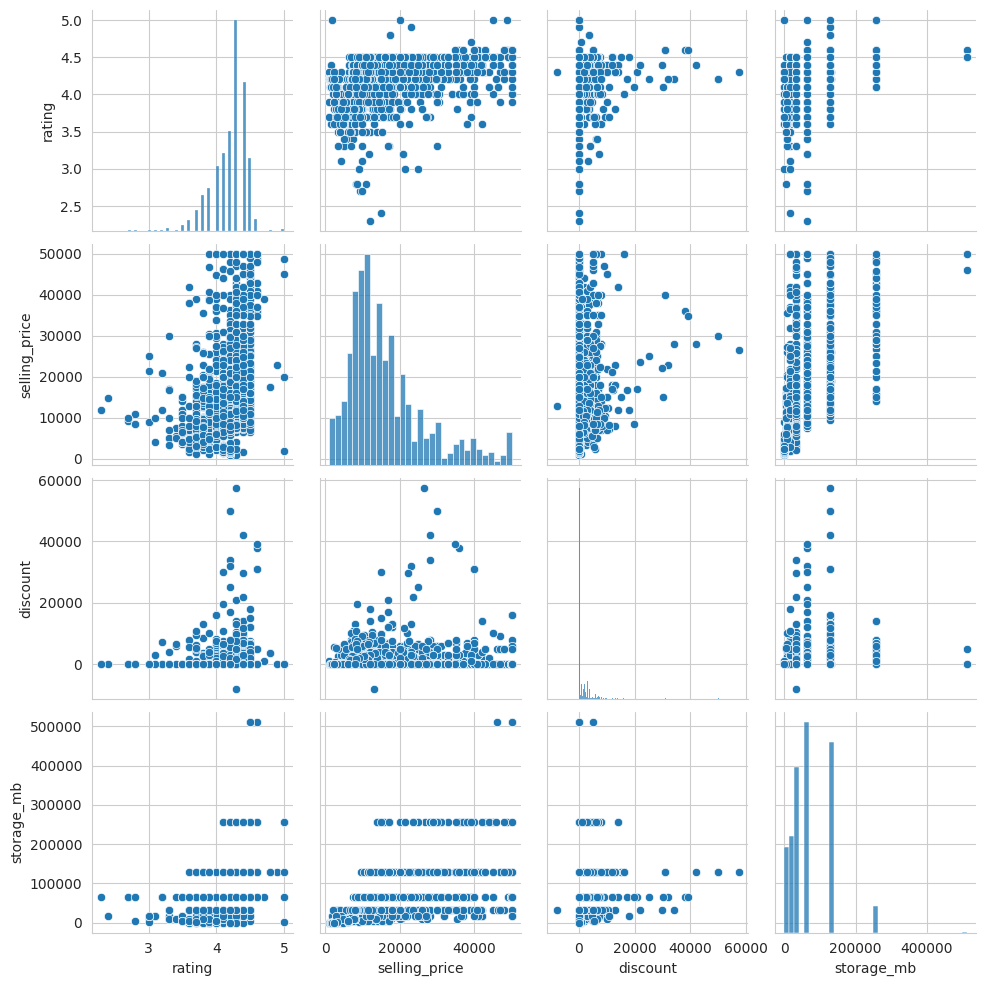

In [ ]:
sns.pairplot(dataset_)

Hagamos ingenieria de variables para un analisis mas profundo (solo para analisis)

In [ ]:
independent_variables = ['rating', 'discount', 'storage_mb']

# Crear un DataFrame con las variables independientes y la variable dependiente
X = dataset[independent_variables]
y = dataset['selling_price']

# Calcular el VIF para cada variable independiente
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Imprimir los valores VIF junto con el nombre de la variable correspondiente
for i, v in enumerate(vif):
    print(f"VIF para la variable {independent_variables[i]}: {v}")

VIF para la variable rating: 2.130522237348197
VIF para la variable discount: 1.1869040823643553
VIF para la variable storage_mb: 2.2199054221699988


In [ ]:
X = dataset[['rating', 'storage_mb', 'discount', 'brands']]
y = dataset['selling_price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_test

,rating,storage_mb,discount,brands
981,4.3,64000,0,Motorola
435,3.8,8000,0,SAMSUNG
955,3.9,32000,0,GIONEE
1365,4.3,128000,0,vivo
1476,3.3,16000,0,SAMSUNG
...,...,...,...,...
244,4.5,64000,0,OPPO
286,4.1,32000,4009,Lenovo
1818,4.4,256000,0,SAMSUNG
3009,4.2,16000,0,SAMSUNG


In [ ]:
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False, dtype=int)

encoder.fit(X_train)

X_train = encoder.transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
scaler = StandardScaler()

# Entranamos el scaler
scaler.fit(X_train)

# Transformamos el dataset de entrenamiento
X_train = scaler.transform(X_train)

#Transformamos el dataset de prueba
X_test = scaler.transform(X_test)

In [ ]:
lm = LinearRegression()

lm.fit(X_train, y_train)

predictions = lm.predict(X_test)

In [ ]:
print('R-Squared:', metrics.r2_score(y_test, predictions))
#print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, predictions))

R-Squared: 0.8843918097300758
Root Mean Squared Error (RMSE): 9568.14431463265
Mean Absolute Error (MAE): 6167.035252869941


In [ ]:
rf = RandomForestRegressor()

model= rf.fit(X_train, y_train)

model.score(X_test ,y_test)

0.8984680315230833

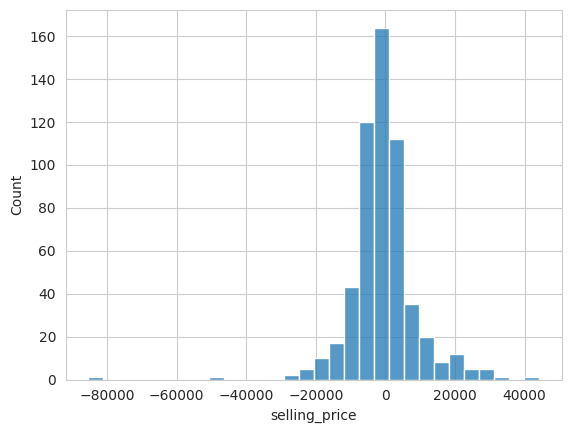

In [ ]:
residuos = y_test - predictions

# Verificacion de la Normalidad de los Errores
sns.histplot((residuos), bins=30);

Inspeccion Visual

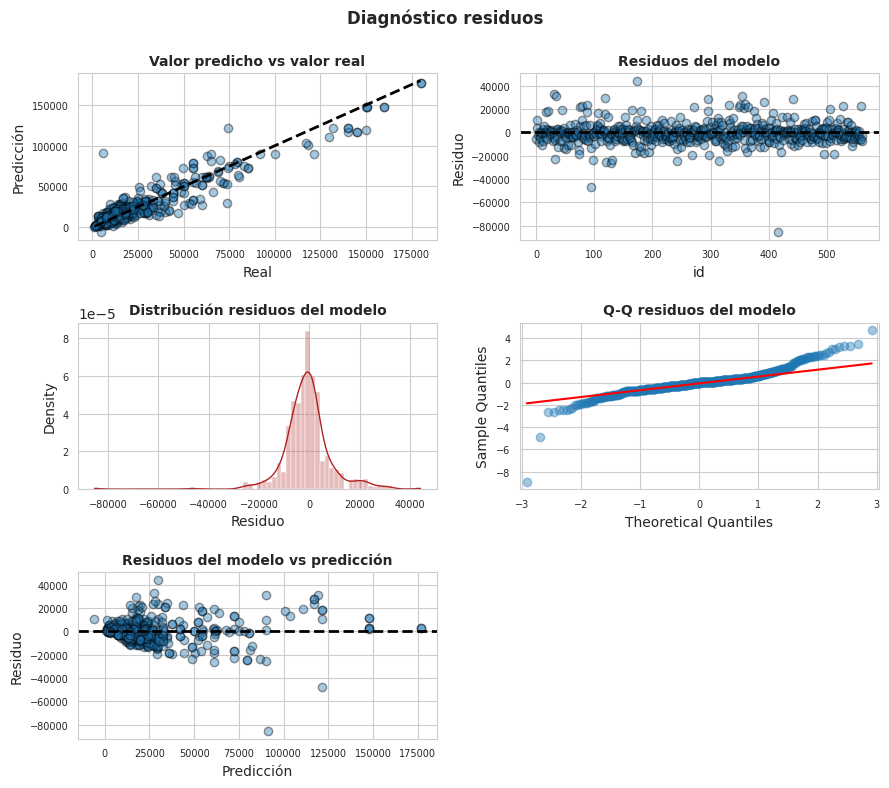

In [ ]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_test, predictions, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_test))), residuos,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1],
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(predictions, residuos,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

#### Test en data ficticia

In [ ]:
# ['rating', 'storage_mb', 'discount', 'brands']

data_test = pd.DataFrame({'rating':[4.5, 4.8],
                          'storage_mb':[128000, 64000],
                          'discount':[0, 0],
                          'brands':['Apple', 'Apple']})

data_test.head()

,rating,storage_mb,discount,brands
0,4.5,128000,0,Apple
1,4.8,64000,0,Apple


In [ ]:
# Aplicamos tratamiento a los datos de prueba
data_test_ = data_test.copy()

# Aplicamos el transform de la variable categorica
data_test_ = encoder.transform(data_test_)

# Transformamos el dataset de entrenamiento
data_test_ = scaler.transform(data_test_)

In [ ]:
data_test['selling_price_lm'] = lm.predict(data_test_)
data_test['selling_price_rf'] = rf.predict(data_test_)
data_test

,rating,storage_mb,discount,brands,selling_price_lm,selling_price_rf
0,4.5,128000,0,Apple,61092.475864,47462.030635
1,4.8,64000,0,Apple,50073.016026,57853.159720
